# Andalucía, ¿cambio estructural o caso aislado?

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import zipfile

In [2]:
import plotly.io as pio
pio.renderers.default = 'browser'

## Elecciones Autonómicas

In [3]:
# En esta primera recolección de datos electorales por provincia no se incluyen los datos del año 2000, dado que los datos 
# correspondientes a tal año son de 2004, de modo que estarían repetidos. Para asegurar que los datos del año 2000 son los 
# correctos, se recolectarán manualmente del periódico Público.

Ano_electoral = ['1982', '1986', '1990', '1994', '1996', '2004', '2008', '2012', '2015', '2018'] 
Reg = ['almeria', 'cadiz', 'cordoba', 'granada', 'huelva', 'jaen', 'malaga', 'sevilla', 'andalucia']
url_0 = 'https://www.datoselecciones.com/andalucia-parlamento-'
id_tab_voto = ['tb1_18', 'tb1_17', 'tb1_16', 'tb1_15', 'tb1_14','tb1_13', 'tb1_1', 'tb1_54', 'tb1_233', 'tb1_244'] 
df = [None]*len(Ano_electoral)*len(Reg)

for i in range(len(Ano_electoral)):
    url_1 = url_0 + Ano_electoral[i]+'/'
    for j in range(len(Reg)):
        url = url_1+Reg[j]
        
        pagina = requests.get(url)
        soup = BeautifulSoup(pagina.content, 'html.parser')
        
        #Aquí se crea un except debido a que en las elecciones de 2004 correspondientes a la circunscripción de cadiz cambia
        #el id de la tabla.

        try:
            
            tbl = soup.find('table', {'id': id_tab_voto[i]})
            df[9*i+j] = pd.read_html(str(tbl))[0]
            
        except:
            
            tbl = soup.find('table', {'id': 'tb1_12'})
            df[9*i+j] = pd.read_html(str(tbl))[0]
            
df[0].head()

#El vector resultante corresponde a noventa data frames, nueve por año, y así ordenados.

,Partidos,Escaños,Votos,%
0,PSOE-A,6,78.870,"48,93%"
1,UCD,3,35.637,"22,11%"
2,AP-PDP-UL,2,27.999,"17,37%"
3,PCAPCE,0,6.661,"4,13%"
4,PSA,0,6.232,"3,87%"


In [4]:
#Es necesario tratar los datos para convertir los porcentajes a tipo int

for i in range(len(df)):
    for j in range(len(df[i])):
        df[i]['%'][j] = float(df[i]['%'][j].replace('%','').replace(',','.'))
        
#Datos del año 2000

df2000 = pd.read_excel('2000.xlsx')
df2 = [None]*9

for i in range(len(df2)):
    df2[i] = df2000.iloc[:, 4*i:(4*i+4)]
    df2[i] = df2[i].dropna()
    df2[i] = df2[i].set_axis(['Partidos', 'Escaños', 'Votos','%'], axis='columns')
    
#Insertamos los datos del año 2000 con el resto

for i in range(len(df2)):
    j = 8-i
    df.insert(45, df2[j])

df[0].head()

C:\Users\adrgo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Partidos,Escaños,Votos,%
0,PSOE-A,6,78.870,48.93
1,UCD,3,35.637,22.11
2,AP-PDP-UL,2,27.999,17.37
3,PCAPCE,0,6.661,4.13
4,PSA,0,6.232,3.87


In [5]:
#Aquí se calculan los porcentajes totales respecto a los bloques.

Derecha = ['UCD','AP-PDP-UL', 'AP-PDP-PL','FN','CDS','PRD','PP','RUIZ-MATEOS','PED','FEJONS','MFE','FORO-CDS','FEI','UC','FEA',
           'FA','FE de las JONS', 'UN', 'UC-CDS', 'PDEAL', "C'S", 'PFyV', 'CDL', 'AES', 'CCD', 'MSR', "C's", 'VOX', 'CILUS',
           'Cs','CILU-LINARES']
Izquierda = ['PSOE-A','PCAPCE','PSA','PST','MUC','UCE','PCOE','MCA','marxista-leninista','CGT','SI','PS','SPA','IU-CA','PA',
             'PSPA','PH','LA','PTE-UC','DS','VA','LVE','PCPA','FAL','AR','PA-PAP','NA','N.A.','OS','IULV-CA','UAD','VDPA','NIVA',
             'A','PTPRE','IR','PSDA', 'A-IZ','OtraDem','CA','VERDES','CANDA','SAIN','PPCR','UPyD','EQUO','PACMA','HARTOS.org',
             'PCPE','ECNP', 'PUM+J','F.C.','PRAO','PHAN','SyR','CAnda','AEV','URAL','IA','AUPAL','RISA','RECORTES CERO','PBG',
             'PTJ','LYG','PNdA','NEODEMÓCRATAS','CÁMBIALO','AxSÍ','ADELANTE ANDALUCÍA','EQUO-INICIATIVA','RECORTES CERO-M+J-GV',
            'UPYD','P.C.O.E.','ALTER','Respeto','IZAR','SOLUCIONA','ConecAnd','UNIDOS SÍ-Democracia efectiva','PCTE', 'PODEMOS']

Porcentaje_Derecha = [None]*len(df)
Porcentaje_Izquierda = [None]*len(df)

Ano_electoral.insert(5,'2000')

for i in range(len(df)):
    contador_derecha = 0
    contador_izquierda = 0
    
    for j in range(len(df[i])):
        if df[i]['Partidos'][j] in Derecha:
            contador_derecha += df[i]['%'][j]
            
        elif df[i]['Partidos'][j] in Izquierda:
            contador_izquierda += df[i]['%'][j]
            
    Porcentaje_Derecha[i] = contador_derecha
    Porcentaje_Izquierda[i] = contador_izquierda
    
for i in range(len(df)):
    Porcentaje_Derecha[i] = round(Porcentaje_Derecha[i],2)
    Porcentaje_Izquierda[i] = round(Porcentaje_Izquierda[i],2)

In [6]:
#Aquí se repite el anterior proceso para conseguir la participación

Ano_electoral = ['1982', '1986', '1990', '1994', '1996', '2004', '2008', '2012', '2015', '2018'] 
Reg = ['almeria', 'cadiz', 'cordoba', 'granada', 'huelva', 'jaen', 'malaga', 'sevilla', 'andalucia']
url_0 = 'https://www.datoselecciones.com/andalucia-parlamento-'
id_tab_voto = ['tb0_18', 'tb0_17', 'tb0_16', 'tb0_15', 'tb0_14','tb0_13', 'tb0_1', 'tb0_54', 'tb0_233', 'tb0_244'] 
df_Part = [None]*len(Ano_electoral)*len(Reg)

for i in range(len(Ano_electoral)):
    url_1 = url_0 + Ano_electoral[i]+'/'
    for j in range(len(Reg)):
        url = url_1+Reg[j]
        
        pagina = requests.get(url)
        soup = BeautifulSoup(pagina.content, 'html.parser')
        
        #Aquí se crea un except debido a que en las elecciones de 2004 correspondientes a la circunscripción de cadiz cambia
        #el id de la tabla.

        try:
            
            tbl = soup.find('table', {'id': id_tab_voto[i]})
            df_Part[9*i+j] = pd.read_html(str(tbl))[0]
            
        except:
            
            tbl = soup.find('table', {'id': 'tb0_12'})
            df_Part[9*i+j] = pd.read_html(str(tbl))[0]

for i in range(len(df_Part)):
    for j in range(len(df_Part[i])):
        try:
            
            df_Part[i][1][j] = int(df_Part[i][1][j].replace('%','').replace('.',''))
            
        except:
            
            pass
        
Vot = [None]*len(df_Part)
Abs = [None]*len(df_Part)
Part = [None]*len(df_Part)

for i in range(len(df_Part)):
    Vot[i] = df_Part[i][1][3]
    Abs[i] = df_Part[i][1][4]
    Part[i] = Vot[i]/(Vot[i]+Abs[i])*100

Part =[ round(elem, 2) for elem in Part]

Part_2000 = [70.16, 63.85, 75.81, 71.00, 67.22, 77.63, 65.93, 70.39, 69.72]

for i in range(len(Part_2000)):
    j = 8-i
    Part.insert(45, Part_2000[j])
    
Ano_electoral.insert(5,'2000')

Part_Andalucia = [None]*len(Ano_electoral)
for i in range(len(Ano_electoral)):
    Part_Andalucia[i] = Part[8+9*i]

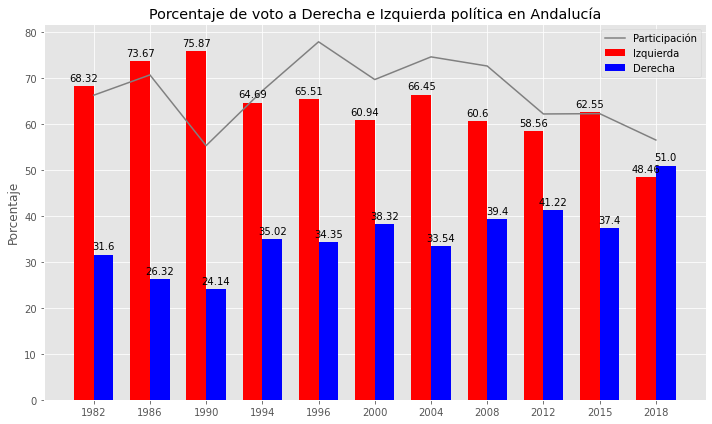

In [7]:
# Ahora se muestra en sendos gráficos de barras la evolución del voto a lo largo de las elecciones

## En Andalucía

Izquierda = [None]*len(Ano_electoral)
Derecha = [None]*len(Ano_electoral)

for i in range(len(Ano_electoral)):
    Izquierda[i] = Porcentaje_Izquierda[8+9*i]
    Derecha[i] = Porcentaje_Derecha[8+9*i]
    
x = np.arange(len(Ano_electoral))

# Tamaño de cada barra

width = 0.35

fig, ax = plt.subplots(figsize = (10,6))

# Barras para la izquierda

bariz = ax.bar(x-width/2, Izquierda, width, color = 'red', label = 'Izquierda')
barder = ax.bar(x+width/2, Derecha, width, color = 'blue', label = 'Derecha')
Parti = ax.plot(x,Part_Andalucia, color = 'grey', label = 'Participación')

ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de voto a Derecha e Izquierda política en Andalucía')
ax.set_xticks(x)
ax.set_xticklabels(Ano_electoral)
ax.legend()

def autolabel(bar):
    for barra in bar:
        height = barra.get_height()
        ax.annotate('{}'.format(height),
                    xy=(barra.get_x() + barra.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bariz)
autolabel(barder)

fig.tight_layout()

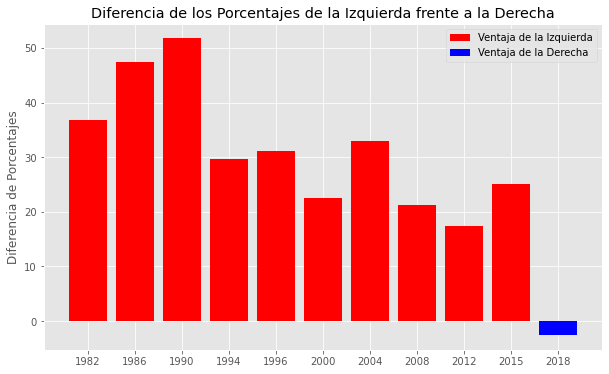

In [8]:
Iz = np.array(Izquierda)
Der = np.array(Derecha)
dif = Iz-Der
dif = dif.tolist()
Diferencia =[ round(elem, 2) for elem in dif]

fig, ax = plt.subplots(figsize = (10,6))

ax.set_ylabel('Diferencia de Porcentajes')
ax.set_title('Diferencia de los Porcentajes de la Izquierda frente a la Derecha')

plt.bar(Ano_electoral[:10], Diferencia[:10], color = 'red', label = 'Ventaja de la Izquierda')
plt.bar(Ano_electoral[-1:], Diferencia[-1:], color = 'blue', label = 'Ventaja de la Derecha')
plt.legend()

In [9]:
# Aquí se creará un dataset de resultados por año y provincia

provincia = ['Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla']

I = np.zeros((len(Ano_electoral),len(provincia)))
D = np.zeros((len(Ano_electoral),len(provincia)))
Df1 = {}
Df2 = {}
for i in range(len(Ano_electoral)):
    for j in range(len(provincia)):
        I[i,j] = Porcentaje_Izquierda[j+9*i]
        D[i,j] = Porcentaje_Derecha[j+9*i]
    Df1[Ano_electoral[i]] = [I[i].tolist()]
    Df2[Ano_electoral[i]] = [D[i].tolist()]
    Df1[Ano_electoral[i]] = Df1[Ano_electoral[i]][0]
    Df2[Ano_electoral[i]] = Df2[Ano_electoral[i]][0]

df_iz = pd.DataFrame(Df1)
df_iz.insert(0, 'Provincia',provincia)
df_der = pd.DataFrame(Df2)
df_der.insert(0, 'Provincia',provincia)

In [10]:
# Preparación de los datos para crear el mapa animado

df_iz = df_iz.groupby('Provincia').agg('sum')
date = list(df_iz.columns)
df_iz['Provincia'] = df_iz.index
df_izq = pd.melt(df_iz, id_vars=['Provincia'], value_vars=date)

df_der = df_der.groupby('Provincia').agg('sum')
date = list(df_der.columns)
df_der['Provincia'] = df_der.index
df_de = pd.melt(df_der, id_vars=['Provincia'], value_vars=date)

In [11]:
import json

provincias = json.load(open('spain_provinces.geojson',encoding = 'utf8'))

In [12]:
province_id = {}
for feature in provincias['features']:
    feature['id'] = feature['properties']['cod_prov']
    for i in range(len(provincia)):
        province_id[feature['properties']['name']] = feature['id']
prov_id = {}
for i in range(len(provincia)):
    prov_id[provincia[i]] = province_id[provincia[i]]
df_izq['id'] = df_izq['Provincia'].apply(lambda x: prov_id[x])
df_de['id'] = df_de['Provincia'].apply(lambda x: prov_id[x])

df_izq.head()

,Provincia,variable,value,id
0,Almería,1982,58.56,04
1,Cádiz,1982,72.42,11
2,Córdoba,1982,68.38,14
3,Granada,1982,65.55,18
4,Huelva,1982,66.60,21


In [13]:
# Mapa con los resultados de la Izquierda por provincias en el periodo 1982-2018

fig = px.choropleth_mapbox(df_izq, 
                    locations = 'id', 
                    geojson = provincias, 
                    color = 'value', 
                    hover_name = 'Provincia',
                    animation_frame = 'variable',
                    color_continuous_scale = 'reds',
                    range_color = [35,80],
                    mapbox_style = 'carto-positron',
                    center = {'lat': 37.471325, 'lon': -4.581459},
                    zoom = 6.5, opacity = 0.5)
fig.show()

In [14]:
# Mapa con los resultados de la Derecha por provincias en el periodo 1982-2018

fig = px.choropleth_mapbox(df_de, 
                    locations = 'id', 
                    geojson = provincias, 
                    color = 'value', 
                    hover_name = 'Provincia',
                    animation_frame = 'variable',
                    color_continuous_scale = 'blues',
                    range_color = [15,60],
                    mapbox_style = 'carto-positron',
                    center = {'lat': 37.471325, 'lon': -4.581459},
                    zoom = 6.5, opacity =0.5)
fig.show()

In [15]:
# Se crea un dataframe con la diferencia de porcentajes de izquierda y derecha

Iz = np.array(df_izq['value'])
Der = np.array(df_de['value'])
dif = Iz-Der
dif.tolist()
df_tot = df_izq
df_tot['Diferencia'] = dif

df_tot.head()

,Provincia,variable,value,id,Diferencia
0,Almería,1982,58.56,04,17.13
1,Cádiz,1982,72.42,11,44.85
2,Córdoba,1982,68.38,14,36.77
3,Granada,1982,65.55,18,31.11
4,Huelva,1982,66.60,21,33.44


In [16]:
# Mapa con la diferencia de porcentajes por provincias

fig = px.choropleth_mapbox(df_tot, 
                    locations = 'id', 
                    geojson = provincias, 
                    color = 'Diferencia', 
                    hover_name = 'Provincia',
                    animation_frame = 'variable',
                    color_continuous_scale = px.colors.diverging.balance,
                    color_continuous_midpoint = 0,
                    range_color = [-65,65],
                    mapbox_style = 'carto-positron',
                    center = {'lat': 37.471325, 'lon': -4.581459},
                    zoom = 6.5, opacity =0.5)
fig.show()

## Elecciones Generales

In [17]:
# Se crea el dataframe con las elecciones 

Ano_electoral_generales = ['1977','1979','1982','1986','1989','1993','1996','2000','2004','2008','2011','2015','2016','2019',
                           '201911']
url_0 = 'https://www.datoselecciones.com/elecciones-generales-congreso-'
id_tab_voto = ['tb1_31', 'tb1_30', 'tb1_29', 'tb1_28', 'tb1_27', 'tb1_26', 'tb1_25', 'tb1_24', 'tb1_23', 'tb1_22', 'tb1_20',
              'tb1_236', 'tb1_237','tb1_246', 'tb1_279']
Df = [None]*len(Ano_electoral_generales)*len(Reg)

for i in range(len(Ano_electoral_generales)):
    url_1 = url_0 + Ano_electoral_generales[i]+'/andalucia/'
    for j in range(len(Reg)):
        
        url = url_1+Reg[j]
        
        pagina = requests.get(url)
        soup = BeautifulSoup(pagina.content, 'html.parser')
        
        tbl = soup.find('table', {'id': id_tab_voto[i]})
        Df[9*i+j] = pd.read_html(str(tbl))[0]
        
        if Ano_electoral_generales[i] == '2019':
            
            # Los resultados de abril del año 2019 no aparecen en la página, por lo que para esas elecciones se emplean los 
            # resultados dados por El País 
            
            id_prov = ['04.html','11.html','14.html','18.html','21.html','23.html','29.html','41.html','']
            id_tabla = 'tablaVotosPartidos'
            nueva_url = 'https://resultados.elpais.com/elecciones/2019-28A/generales/congreso/01/'
                
            url = nueva_url+id_prov[j]
            
            pagina = requests.get(url)
            soup = BeautifulSoup(pagina.content, 'html.parser')
        
            tbl = soup.find('table', {'id': id_tabla})
            Df[9*i+j] = pd.read_html(str(tbl))[0]

Df[134].head()

,Partidos,Diputados,Votos,%
0,PSOE,25,1.420.005,"33,77%"
1,PP,15,874.190,"20,79%"
2,VOX,12,867.429,"20,63%"
3,PODEMOS-IU LV CA,6,555.902,"13,22%"
4,Cs,3,344.274,"8,19%"


In [18]:
# Se convierten los datos de porcentajes a int

for i in range(len(Df)):
    for j in range(len(Df[i])):
        Df[i]['%'][j] = float(Df[i]['%'][j].replace('%','').replace(',','.').replace('-','0'))
        
# Se consiguen los datos de la participación

Ano_electoral_generales = ['1977','1979','1982','1986','1989','1993','1996','2000','2004','2008','2011','2015','2016','2019',
                           '201911']
url_0 = 'https://www.datoselecciones.com/elecciones-generales-congreso-'
id_tab_voto = ['tb0_31', 'tb0_30', 'tb0_29', 'tb0_28', 'tb0_27', 'tb0_26', 'tb0_25', 'tb0_24', 'tb0_23', 'tb0_22', 'tb0_20',
              'tb0_236', 'tb0_237','tb0_246', 'tb0_279']
Df_Part = [None]*len(Ano_electoral_generales)*len(Reg)

for i in range(len(Ano_electoral_generales)):
    url_1 = url_0 + Ano_electoral_generales[i]+'/andalucia/'
    for j in range(len(Reg)):
        
        url = url_1+Reg[j]
        
        pagina = requests.get(url)
        soup = BeautifulSoup(pagina.content, 'html.parser')
        
        tbl = soup.find('table', {'id': id_tab_voto[i]})
        Df_Part[9*i+j] = pd.read_html(str(tbl))[0]
        
        if Ano_electoral_generales[i] == '2019':
            
            # Los resultados de abril del año 2019 no aparecen en la página, por lo que para esas elecciones se emplean los 
            # resultados dados por El País 
            
            id_prov = ['04.html','11.html','14.html','18.html','21.html','23.html','29.html','41.html','']
            id_tabla = 'tablaResumen'
            nueva_url = 'https://resultados.elpais.com/elecciones/2019-28A/generales/congreso/01/'
                
            url = nueva_url+id_prov[j]
            
            pagina = requests.get(url)
            soup = BeautifulSoup(pagina.content, 'html.parser')
        
            tbl = soup.find('table', {'id': id_tabla})
            Df_Part[9*i+j] = pd.read_html(str(tbl))[0]

for i in range(len(Df_Part)):
    for j in range(len(Df_Part[i])):
        
        try:
        
            Df_Part[i][1][j] = int(Df_Part[i][1][j].replace('%','').replace('.',''))
            
        except:
            
            pass
        
Vot = [None]*len(Df_Part)
Abs = [None]*len(Df_Part)
Part = [None]*len(Df_Part)

for i in range(len(Df_Part)):
    
    Vot[i] = Df_Part[i][1][3]
    Abs[i] = Df_Part[i][1][4]
        
    if i in range(117,126):
        
        Vot[i] = Df_Part[i][1][2]
        Abs[i] = Df_Part[i][1][3]
        
    Part[i] = Vot[i]/(Vot[i]+Abs[i])*100
        
Part =[ round(elem, 2) for elem in Part]

Part_Andalucia_generales = [None]*len(Ano_electoral_generales)
for i in range(len(Ano_electoral_generales)):
    Part_Andalucia_generales[i] = Part[8+9*i]

C:\Users\adrgo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# Aquí se calculará el peso de los bloques, tal como se hizo con las elecciones autonómicas

derecha = ['UCD','AP','FDC-EDC','URA','ANEPA-CP','AN18','FJONSA','FJONS','CJA','PAE','PLI','CD','UN','PPROV','AP-PDP','CDS',
          'FN','SE','MFE','FE-I','FE-JONS','AP-PDP-PL','PRD','CUN','PP','RUIZ-MATEOS','PED','P.PR.','GIL','FE (I)', 'UC', 'FEI',
          'FEA','AUN','FE','UC-CDS','ES2000','PADE','FEI-FE 2000','PFyV','FE de las JONS','DN','MSR','ESPAÑA 2000','FA','P.P.',
          'PdeAL',"C's",'AES','F.A.','E-2000','A.u.N','FRENTE','D.N.','VOX','CILUS','FE de las J','Cs','CILU-LINARES','C´s']
izquierda = ['PSOE','PCE','PSP-US','FDI','RSE','ASDCI','ASA','MSA','AET','FUT','BAI','CAI','PSA-PA','PCA-PCE','PST','PCOE',
             'CUC','PCE(M-L)','LC(COSI)','MCA','PS','IU','PA','MUC','PSPA','UPR','POSI','AV','VERDE','PCC','PSOE-A','IU-CA',
            'LV-LV','PTE-UC','LVE','PCPA','PH','AR','PCE-(M.L.)','PAP','LE','NPS','S.E.','OS','PIAP','PRT','UAD','VDPA',
            'PSOE-PROGR.','IA','A','URAL','PPCR','IULV-CA','PSA','PTPRE','A-IZ','PPCr','PSDA','PCPE','P.S.O.E.','CA','UPyD',
            'PACMA','P.S.D.','PUM+J','SAIn','RCN-NOK','EQUO','P.C.P.E.','ANTICAPITALISTAS','PRAO','DeC','RPS','IU-UPeC','UPYD',
            'RECORTES CE','mlgXSÍ','AJU','SOLUCIONA','PODEMOS-IU-','RECORTES CERO-GRUPO VERDE','AND','IZAR','CAnda','PACT',
            'PCTE','RISA','PODEMOS','PODEMOS-IU LV CA','MÁS PAÍS-ANDALUCÍA','AxSÍ','RECORTES CERO-GV','PODEMOS-IU LV CA-EQUO',
            'AxSI','PSA-PSOE','PSA-PA','PSOE-H','IULV-CA, UP', 'PCPE', 'MC-OIC','IULV-CA,UPe', 'UP: IULV-CA','PSOE de A']

Porcentaje_derecha = [None]*len(Df)
Porcentaje_izquierda = [None]*len(Df)

for i in range(len(Df)):
    contador_Derecha = 0
    contador_Izquierda = 0
    
    try:
        
        for j in range(len(Df[i])):
            if Df[i]['Partidos'][j] in derecha:
                contador_Derecha += Df[i]['%'][j]
            
            elif Df[i]['Partidos'][j] in izquierda:
                contador_Izquierda += Df[i]['%'][j]
                
    except:
        
        for j in range(len(Df[i])):
            if Df[i]['Partido'][j] in derecha:
                contador_Derecha += Df[i]['%'][j]
            
            elif Df[i]['Partido'][j] in izquierda:
                contador_Izquierda += Df[i]['%'][j]

    Porcentaje_derecha[i] = contador_Derecha
    Porcentaje_izquierda[i] = contador_Izquierda
    
for i in range(len(Df)):
    Porcentaje_derecha[i] = round(Porcentaje_derecha[i],2)
    Porcentaje_izquierda[i] = round(Porcentaje_izquierda[i],2)

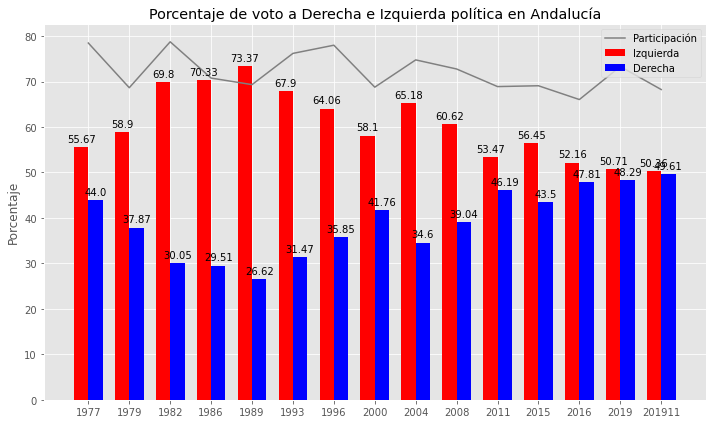

In [20]:
Izquierda_generales = [None]*len(Ano_electoral_generales)
Derecha_generales = [None]*len(Ano_electoral_generales)

for i in range(len(Ano_electoral_generales)):
    Izquierda_generales[i] = Porcentaje_izquierda[8+9*i]
    Derecha_generales[i] = Porcentaje_derecha[8+9*i]
    
x = np.arange(len(Ano_electoral_generales))

# Tamaño de cada barra

width = 0.35

fig, ax = plt.subplots(figsize = (10,6))

# Barras para la izquierda

bariz = ax.bar(x-width/2, Izquierda_generales, width, color = 'red', label = 'Izquierda')
barder = ax.bar(x+width/2, Derecha_generales, width, color = 'blue', label = 'Derecha')
Parti = ax.plot(x,Part_Andalucia_generales, color = 'grey', label = 'Participación')

ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de voto a Derecha e Izquierda política en Andalucía')
ax.set_xticks(x)
ax.set_xticklabels(Ano_electoral_generales)
ax.legend()

autolabel(bariz)
autolabel(barder)

fig.tight_layout()

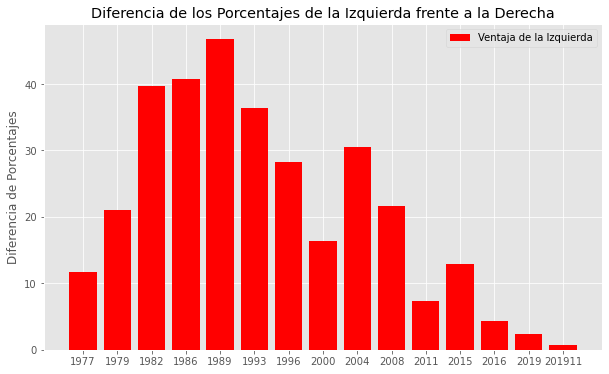

In [21]:
Iz = np.array(Izquierda_generales)
Der = np.array(Derecha_generales)
dif = Iz-Der
dif = dif.tolist()
Diferencia_generales =[ round(elem, 2) for elem in dif]

fig, ax = plt.subplots(figsize = (10,6))

ax.set_ylabel('Diferencia de Porcentajes')
ax.set_title('Diferencia de los Porcentajes de la Izquierda frente a la Derecha')

plt.bar(Ano_electoral_generales, Diferencia_generales, color = 'red', label = 'Ventaja de la Izquierda')
plt.legend()

In [22]:
# Aquí se crearán dos dataframe de resultados por año y provincia

I_generales = np.zeros((len(Ano_electoral_generales),len(provincia)))
D_generales = np.zeros((len(Ano_electoral_generales),len(provincia)))
Df1 = {}
Df2 = {}
for i in range(len(Ano_electoral_generales)):
    for j in range(len(provincia)):
        I_generales[i,j] = Porcentaje_izquierda[j+9*i]
        D_generales[i,j] = Porcentaje_derecha[j+9*i]
    Df1[Ano_electoral_generales[i]] = [I_generales[i].tolist()]
    Df2[Ano_electoral_generales[i]] = [D_generales[i].tolist()]
    Df1[Ano_electoral_generales[i]] = Df1[Ano_electoral_generales[i]][0]
    Df2[Ano_electoral_generales[i]] = Df2[Ano_electoral_generales[i]][0]

Df_iz = pd.DataFrame(Df1)
Df_iz.insert(0, 'Provincia',provincia)
Df_de = pd.DataFrame(Df2)
Df_de.insert(0, 'Provincia',provincia)

In [23]:
# Preparación de datos para el mapa animado

Df_iz = Df_iz.groupby('Provincia').agg('sum')
date = list(Df_iz.columns)
Df_iz['Provincia'] = Df_iz.index
Df_izq = pd.melt(Df_iz, id_vars=['Provincia'], value_vars=date)

Df_de = Df_de.groupby('Provincia').agg('sum')
date = list(Df_de.columns)
Df_de['Provincia'] = Df_de.index
Df_der = pd.melt(Df_de, id_vars=['Provincia'], value_vars=date)

In [24]:
Df_izq['id'] = Df_izq['Provincia'].apply(lambda x: prov_id[x])
Df_der['id'] = Df_der['Provincia'].apply(lambda x: prov_id[x])

Df_izq.head()

,Provincia,variable,value,id
0,Almería,1977,38.34,04
1,Cádiz,1977,60.17,11
2,Córdoba,1977,56.21,14
3,Granada,1977,48.17,18
4,Huelva,1977,45.70,21


In [25]:
# Mapa animado con los resultados de la Izquierda en Andalucía en elecciones generales por circunscripción en el 
# periodo 1977-2019

fig = px.choropleth_mapbox(Df_izq, 
                    locations = 'id', 
                    geojson = provincias, 
                    color = 'value', 
                    hover_name = 'Provincia',
                    animation_frame = 'variable',
                    color_continuous_scale = 'reds',
                    range_color = [35,80],
                    mapbox_style = 'carto-positron',
                    center = {'lat': 37.471325, 'lon': -4.581459},
                    zoom = 6.5, opacity = 0.5)
fig.show()

In [26]:
# Mapa animado con los resultados de la Derecha en Andalucía en elecciones generales por circunscripción en el 
# periodo 1977-2019

fig = px.choropleth_mapbox(Df_der, 
                    locations = 'id', 
                    geojson = provincias, 
                    color = 'value', 
                    hover_name = 'Provincia',
                    animation_frame = 'variable',
                    color_continuous_scale = 'blues',
                    range_color = [15,60],
                    mapbox_style = 'carto-positron',
                    center = {'lat': 37.471325, 'lon': -4.581459},
                    zoom = 6.5, opacity =0.5)
fig.show()

In [27]:
Iz = np.array(Df_izq['value'])
Der = np.array(Df_der['value'])
dif = Iz-Der
dif.tolist()
Df_tot = Df_izq
Df_tot['Diferencia'] = dif

Df_tot.head()

,Provincia,variable,value,id,Diferencia
0,Almería,1977,38.34,04,-23.31
1,Cádiz,1977,60.17,11,21.92
2,Córdoba,1977,56.21,14,12.88
3,Granada,1977,48.17,18,-3.67
4,Huelva,1977,45.70,21,-8.60


In [28]:
# Mapa animado con la diferencia de porcentajes entre Izquierda y Derecha en Andalucía por circunscripción para el periodo
# 1977-2019

fig = px.choropleth_mapbox(Df_tot, 
                    locations = 'id', 
                    geojson = provincias, 
                    color = 'Diferencia', 
                    hover_name = 'Provincia',
                    animation_frame = 'variable',
                    color_continuous_scale = px.colors.diverging.balance,
                    color_continuous_midpoint = 0,
                    range_color = [-55,55],
                    mapbox_style = 'carto-positron',
                    center = {'lat': 37.471325, 'lon': -4.581459},
                    zoom = 6.5, opacity =0.5)
fig.show()